### HW5. Simulation of Baseball Dynamics
### 2022313047 Boyeon,Kim

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Set plot params
plt.rcParams['figure.figsize'] = [5,5]
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.major.size'] = 7
plt.rcParams['ytick.major.size'] = 7
plt.rcParams['xtick.minor.size'] = 3.5
plt.rcParams['ytick.minor.size'] = 3.5
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.width'] = 1.5
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

### 1. (Runge-Kutta Methods)  
### Solve the initial-value problem $x^′ = t + 2xt$ with $x(0) = 0$ on the interval [0,2] using the Runge-Kutta formulas.

#### (1) Find $x(t)$ using the second-order Runge-Kutta method with $h = 0.01$.

In [3]:
# Define the integrand
def f(t, x):
    return t + 2 * x * t


In [4]:
# RK2
def RK2(f, t0, y0, tmax, dt):
    n = int((tmax - t0)/dt) + 1
    t = np.arange(t0, tmax+dt, dt)
    y = np.zeros(n)

    y[0] = y0
    
    #RK2
    for i in range(n-1):
        k1 = dt * f(t[i], y[i])
        k2 = dt * f(t[i] + dt/2, y[i]+k1/2)

        y[i+1] = y[i] + k2

    return t, y

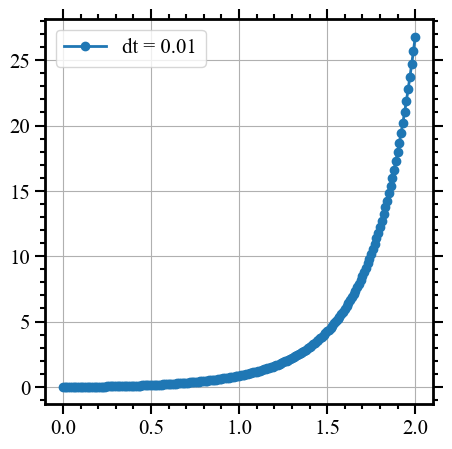

In [15]:
t1, y1 = RK2(f, t0 = 0, y0 = 0, tmax = 2, dt = 0.01)

plt.plot(t1, y1, '-o', label = 'dt = 0.01')
plt.legend()
plt.grid()

#### (2) Find x(t) using the fourth-order Runge-Kutta method with h = 0.01.

In [6]:
# RK4
def RK4(f, t0, y0, tmax, dt):
    n = int((tmax - t0)/dt) + 1
    t = np.arange(t0, tmax+dt, dt)
    y = np.zeros(n)

    y[0] = y0
    
    #RK2
    for i in range(n-1):
        k1 = dt * f(t[i], y[i])
        k2 = dt * f(t[i] + dt/2, y[i]+k1/2)
        k3 = dt * f(t[i] + dt/2, y[i]+k2/2)
        k4 = dt * f(t[i] + dt, y[i]+k3)

        y[i+1] = y[i] + k1/6 + k2/3 + k3/3 + k4/6

    return t, y

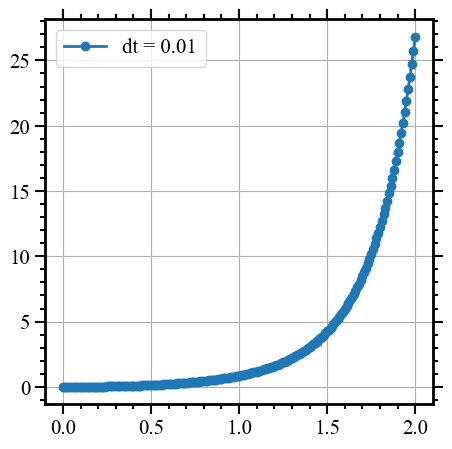

In [7]:
t2, y2 = RK4(f, t0 = 0, y0 = 0, tmax = 2, dt = 0.01)

plt.plot(t2, y2, '-o', label = 'dt = 0.01')
plt.legend()
plt.grid()

#### (3) Compare the solutions in (1) and (2) with the true solution: $1/2(e^{t^2} −1)$ and discuss order of accuracy for two Runge-Kutta methods.

In [8]:
# exact function
def exact(t):
    return 0.5 * (np.exp(t**2) - 1)

In [9]:
# exact function values
exact = exact(t1)

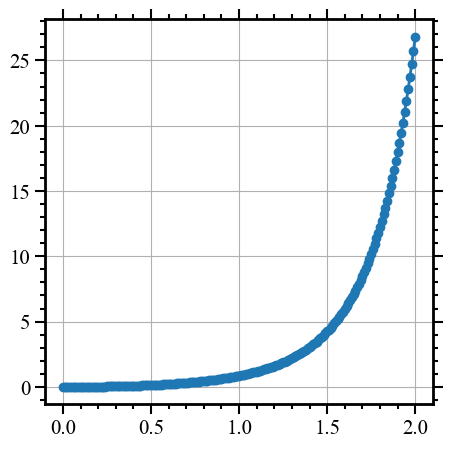

In [17]:
plt.plot(t1, exact, 'o-')
plt.grid()

In [20]:
print('RK2 vs. exact')
print('  n    appx       error           convergence rate')
old_err = np.nan
err1_window = []
ratio1_window = []
for n in range(len(t1)):
    appx = y1[n]
    err1 = np.linalg.norm(appx, exact[n])
    ratio = old_err/err1
    old_err = err1
    ratio1_window.append(ratio)
    err1_window.append(err1)
    print(f' {n:2d}    {appx:6f}   {err1:4e}    {ratio:.2f}')

RK2 vs. exact
  n    appx       error           convergence rate


ValueError: Improper number of dimensions to norm.

In [12]:
print('RK2 vs. exact')
print('  n    appx       error           convergence rate')
old_err = np.nan
err2_window = []
ratio2_window = []
for n in range(len(t1)):
    appx = y2[n]
    err2 = abs(exact[n] - appx)**2
    ratio = old_err/err2
    old_err = err2
    ratio2_window.append(ratio)
    err2_window.append(err2)
    print(f' {n:2d}    {appx:6f}   {err2:4e}    {ratio:.2f}')

RK2 vs. exact
  n    appx       error           convergence rate
  0    0.000000   0.000000e+00    nan
  1    0.000050   5.624924e-34    0.00
  2    0.000200   4.431567e-33    0.13
  3    0.000450   4.943568e-33    0.90
  4    0.000801   1.884031e-32    0.26
  5    0.001252   1.586715e-31    0.12
  6    0.001803   4.331097e-31    0.37
  7    0.002456   1.024571e-30    0.42
  8    0.003210   2.303969e-30    0.44
  9    0.004066   4.857467e-30    0.47
 10    0.005025   8.773683e-30    0.55
 11    0.006087   1.673911e-29    0.52
 12    0.007252   3.022073e-29    0.55
 13    0.008522   5.323522e-29    0.57
 14    0.009897   8.856457e-29    0.60
 15    0.011378   1.482133e-28    0.60
 16    0.012965   2.397586e-28    0.62
 17    0.014661   3.790342e-28    0.63
 18    0.016465   5.952210e-28    0.64
 19    0.018380   9.304560e-28    0.64
 20    0.020405   1.425404e-27    0.65
 21    0.022543   2.166862e-27    0.66
 22    0.024795   3.277090e-27    0.66
 23    0.027162   4.895083e-27    0.67


Text(0.5, 1.0, 'RK2 vs. RK4: 2-norm error')

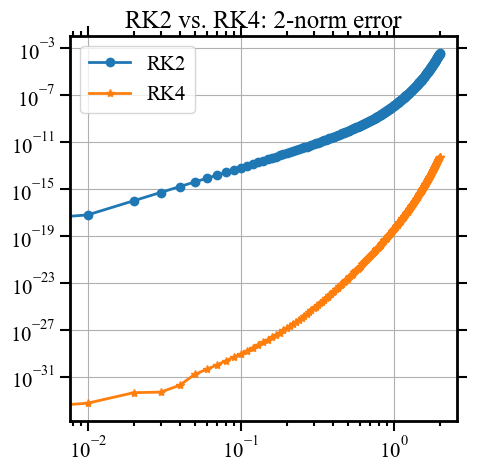

In [13]:
plt.loglog(t1, err1_window, 'o-', label = 'RK2')
plt.loglog(t1, err2_window, '*-', label = 'RK4')
plt.legend()
plt.grid()
plt.title('RK2 vs. RK4: 2-norm error')


Text(0.5, 1.0, 'RK2 vs. RK4: convergence ratio')

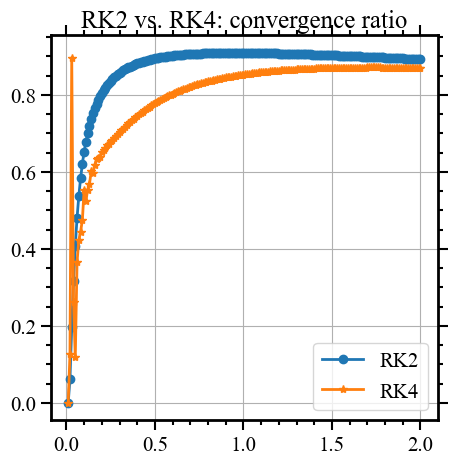

In [14]:
plt.plot(t1, ratio1_window, 'o-', label = 'RK2')
plt.plot(t1, ratio2_window, '*-', label = 'RK4')
plt.legend()
plt.grid()
plt.title('RK2 vs. RK4: convergence ratio')

#### (4) Discuss the effect of the step size h on the solutions by using the fourth-order Runge-Kutta method.
Hint: Compare the errors at $t = 2$ between the numerical and true solution for the different step sizes $h = 0.01, 0.05, 0.1$.